### __Predicting Used Car Sale Prices__

---
## Problem Description and Initial Data Analysis

In [ ]:
# Import the datasets and essential packages
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Neat printing settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
print('Train dataframe shape:',df_train.shape)
print('Test dataframe shape:',df_test.shape)
print(df_train.info())
print(df_train.info())

df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train.head()

In [ ]:
df_test.head()

|Variable Kind|Feature Names
| --- | --- |
| Numeric  | vin, back_legroom, city_fuel_economy, daysonmarket,  engine_displacement, front_legroom, fuel_tank_volume, height, highway_fuel_economy, horsepower, length, maximum_seating, mileage, power, savings_amount, torque, wheelbase, width|
| Ordinal  | seller_rating, year  |
| Nominal   | body_type, city, dealer_zip, engine_type, exterior_color, franchise_dealer, fuel_type, interior_color, is_new, latitude, listed_date, listing_color, longitude, make_name, model_name, transmission, transmission_display, wheel_system|

In [ ]:
categoricals = ['body_type', 'franchise_dealer', 'fuel_type', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'seller_rating', 'transmission', 'no_of_gears', 'wheel_system', 'year', 'cylinders', 'cylinder_arrangement']
columns_to_include = [col for col in df_train.columns if col not in categoricals]
df_train[columns_to_include].describe().drop(['count', '25%', '75%'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data=df_train, x='fuel_type', stat='count', ax=axes[0])
axes[0].set_title('Histogram for fuel_type')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees
#
sns.histplot(data=df_train, x='body_type', stat='count', ax=axes[1])
axes[1].set_title('Histogram for body_type')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

# sns.histplot(data=df_train, x='cylinders', stat='count', ax=axes[2])
# axes[2].set_title('Histogram for cylinders')
# axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Categorical columns for which we want pie charts
pie_charts = ['franchise_dealer', 'transmission', 'is_new']

# Define the colors - four differnt hues of blue for the segments
colors = plt.cm.Blues([0.25, 0.45, 0.65, 0.8])

# Define mappings for each categirical column
mapping = {
    'franchise_dealer': {0: 'Independent', 1: 'Franchise'},
    'transmission': {'A': 'Automatic', 'M': 'Manual', 'CVT': 'CVT', 'Dual Clutch': 'Dual Clutch'},
    'is_new': {0: 'over 2y', 1: 'less than 2y'}
}


# Create a grid of pie charts
num_rows = 3
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5, 10))

# Plot pie charts for each column in the dataframe
for i, column in enumerate(pie_charts):
    row = i

    # Plot pie chart for current column
    axs[row].pie(df_train[column].value_counts(),  colors=colors, autopct='%1.1f%%', startangle=90, labeldistance=None)
    axs[row].set_title(f'{column} Distribution')

    # Legend for the pie chart
    legend_labels = [mapping[column][val] for val in df_train[column].value_counts().index]
    axs[row].legend(labels=legend_labels, title=column, loc='upper left', fontsize='small', bbox_to_anchor=(0.9,0.85))


# Adjust layout
plt.tight_layout()
#plt.savefig('Pie_charts', dpi=300) #saving the figure for the report
# Show plot
plt.show()

---
## Data Cleaning, Missing Observations and Feature Engineering

The columns `back_legroom`, `front_legroom`, `fuel_tank_volume`, `height`, `length`, `maximum_seating`, `wheelbase` and `width` have text alongside the numeric values such as <b>37.4 in</b> for back_legroom and these are stripped to obtain numeric columns out of them.

The columns `power` and `torque` both have numeric and text together but as they contain multiple pieces of information.

In [ ]:
# Numerical features containibg text elements - Numerical portion extracted using regex and saved as float type data

# back_legroom
df_train['back_legroom'] = df_train['back_legroom'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['back_legroom'] = df_test['back_legroom'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# front_legroom
df_train['front_legroom'] = df_train['front_legroom'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['front_legroom'] = df_test['front_legroom'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# fuel_tank_volume
df_train['fuel_tank_volume'] = df_train['fuel_tank_volume'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['fuel_tank_volume'] = df_test['fuel_tank_volume'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# height
df_train['height'] = df_train['height'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['height'] = df_test['height'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# length
df_train['length'] = df_train['length'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['length'] = df_test['length'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# maximum_seating
df_train['maximum_seating'] = df_train['maximum_seating'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['maximum_seating'] = df_test['maximum_seating'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# wheelbase
df_train['wheelbase'] = df_train['wheelbase'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['wheelbase'] = df_test['wheelbase'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

# width
df_train['width'] = df_train['width'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field
df_test['width'] = df_test['width'].str.extract(r'(\d+\.?\d*)').astype(float) # extract numerical part into the field

No numeric feature columns now contain text or special character data

In [ ]:
# Split power column to obtain horsepower (max_hp) and the max_hp_RPM in two new columns
df_train['max_hp'] = df_train['power'].str.extract(r'(\d+)\s*hp').astype(float)
df_train['max_hp_RPM'] = df_train['power'].str.extract(r'@\s*([\d,]+)\s*RPM')[0].str.replace(',', '').astype(float) # extract numerical part into the field
df_test['max_hp'] = df_test['power'].str.extract(r'(\d+)\s*hp').astype(float)
df_test['max_hp_RPM'] = df_test['power'].str.extract(r'@\s*([\d,]+)\s*RPM')[0].str.replace(',', '').astype(float) # extract numerical part into the field

# Split torque column to obtain torque (max_torque) and the max_torque_RPM in two new columns
df_train['max_torque'] = df_train['torque'].str.extract(r'(\d+)\s*lb-ft').astype(float)
df_train['max_torque_RPM'] = df_train['torque'].str.extract(r'@\s*([\d,]+)\s*RPM')[0].str.replace(',', '').astype(float) # extract numerical part into the field
df_test['max_torque'] = df_test['torque'].str.extract(r'(\d+)\s*lb-ft').astype(float)
df_test['max_torque_RPM'] = df_test['torque'].str.extract(r'@\s*([\d,]+)\s*RPM')[0].str.replace(',', '').astype(float) # extract numerical part into the field

# drop power and torque columns as the infromation is now redundent
df_train = df_train.drop(columns=['torque', 'power', 'max_hp'])
df_test = df_test.drop(columns=['torque', 'power', 'max_hp'])

# Calculate the age of the vehicle into a new column
df_train['listed_date'] = pd.to_datetime(df_train['listed_date']) # Convert the listed_date column to date time format (currently object)
df_train['age'] = df_train['listed_date'].dt.year - df_train['year'] # Calculate the age of the vehicle
# Same for the test data set
df_test['listed_date'] = pd.to_datetime(df_test['listed_date'])
df_test['age'] = df_test['listed_date'].dt.year - df_test['year']

# The engine_type contains the cylinder arrangement and the number of cylinders
# Extracting this inforamtion to two new columns
df_train['cylinders'] = df_train['engine_type'].str.extract(r'(\d+)').astype(float) # Extract number of cylinders
df_test['cylinders'] = df_test['engine_type'].str.extract(r'(\d+)').astype(float)
df_train['cylinder_arrangement'] = df_train['engine_type'].str.extract(r'^([A-Za-z])') # Extract cylinder arrrngement
df_test['cylinder_arrangement'] = df_test['engine_type'].str.extract(r'^([A-Za-z])')
# Drop engine_type as the information is now redundent
df_train = df_train.drop(columns=['engine_type'])
df_test = df_test.drop(columns=['engine_type'])

# transmission_display column contains both the number of gears and transmission type
# number of gears is extracted into a new column no_of_gears and the rest is discarded as the tranmission type is already available
df_train['no_of_gears'] = df_train['transmission_display'].str.extract(r'^(\d)').astype(float).astype('Int64') # Extract number of cylinders
df_test['no_of_gears'] = df_test['transmission_display'].str.extract(r'^(\d)').astype(float).astype('Int64')
# Drop transmission_display as the information is now redundent
df_train = df_train.drop(columns=['transmission_display'])
df_test = df_test.drop(columns=['transmission_display'])

The new features added from columns with multiple information items are `max_hp`, `max_hp_RPM`, `max_torque`, `max_torque_RPM`, `cylinder_arrangement` and `cylinders`. The `age` of the car in years was also computed from available information.

- The feature `power` was split to obtain `max_hp` (maximum horsepower) and `max_hp_RPM` (the RPM at maximum horsepower) features and similarly, the `torque` feature was split to obtain two new features, `max_torque` (maximum torque) and `max_torque_RPM` (the RPM at maximum torque).
    
- Next, the age of the car was calculated and added as a new feature `age` using the year extracted from the `listed_date` and the vehicle's manufacturing year available under `year`.

- The `engine_type` feature contains the cylinder arrangement as well as the number of cylinders in it (eg: V8). The number of cylinders in this example is 8 which the arrangement being 'V'. The number of cylinders is extracted as a new feature `cylinders`  and the cylinder arrnagement is extracted into the new feature `cylinder_arrangement` using this information.

- Lastly, the `transmission_display` column has the transmission type and the number of gears. The transmission type is already included in the `transmission` feature. Therefore the numner of geras is extracted into the new column `no_of_gears` and the `transmission_display` column was dropped.

Missing value imputations will be done the same way for both data sets and also mean values will be more accurate with more data. Therefore, both data sets will be combined for this task.

In [ ]:
## Reset indexes and combine to one dataframe for missing value imputations
df_train.reset_index(drop=True, inplace=True) # Reset train dataset index
df_test.reset_index(drop=True, inplace=True) # Reset test dataset index
df_train_without_price = df_train.drop(columns=['price']) # extrac the prediction features only
combined_df = pd.concat([df_train_without_price, df_test], axis=0) # combined dataframe
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# Mode impute funciton to handle missing values when imputing
def mode_fill(x):
    mode_values = x.mode()
    if not mode_values.empty:
        return mode_values.iloc[0]  # Return the first mode value
    else:
        return np.nan  # Return NaN if no mode is found

Numerical features will be imputed using the mean or median as appropriate.
    
- However in the event of features that are related to the vehicle's specific model, the imputation will be based on grouping by the `make_name` and `model_name`.
    
- Features relating to a vehicle's shape/ size will be based on groupings by `body_type`.


In [ ]:
# Same body type will be comparable with front/ back leg room, height, length, wheelbase, width, maximum seating and horsepower
combined_df['back_legroom'] = combined_df['back_legroom'].fillna(combined_df.groupby(['body_type'])['back_legroom'].transform('mean'))
combined_df['front_legroom'] = combined_df['front_legroom'].fillna(combined_df.groupby(['body_type'])['front_legroom'].transform('mean'))
combined_df['height'] = combined_df['height'].fillna(combined_df.groupby(['body_type'])['height'].transform('mean'))
combined_df['length'] = combined_df['length'].fillna(combined_df.groupby(['body_type'])['length'].transform('mean'))
combined_df['wheelbase'] = combined_df['wheelbase'].fillna(combined_df.groupby(['body_type'])['wheelbase'].transform('mean'))
combined_df['width'] = combined_df['width'].fillna(combined_df.groupby(['body_type'])['width'].transform('mean'))
combined_df['maximum_seating'] = combined_df['maximum_seating'].fillna(combined_df.groupby(['body_type'])['maximum_seating'].transform('median'))

# Horsepower, fuel economies, tank volume, engine torque and RPM data, fuel type, transmission and wheel system will be comarable with vehicles of same model/make
combined_df['horsepower'] = combined_df['horsepower'].fillna(combined_df.groupby(['make_name', 'model_name'])['horsepower'].transform('mean'))
combined_df['highway_fuel_economy'] = combined_df['highway_fuel_economy'].fillna(combined_df.groupby(['make_name', 'model_name'])['highway_fuel_economy'].transform('mean'))
combined_df['city_fuel_economy'] = combined_df['city_fuel_economy'].fillna(combined_df.groupby(['make_name', 'model_name'])['city_fuel_economy'].transform('mean'))
combined_df['fuel_tank_volume'] = combined_df['fuel_tank_volume'].fillna(combined_df.groupby(['make_name', 'model_name'])['fuel_tank_volume'].transform('mean'))
combined_df['max_torque'] = combined_df['max_torque'].fillna(combined_df.groupby(['make_name', 'model_name'])['max_torque'].transform('median'))
combined_df['max_torque_RPM'] = combined_df['max_torque_RPM'].fillna(combined_df.groupby(['make_name', 'model_name'])['max_torque_RPM'].transform('median'))
combined_df['max_hp_RPM'] = combined_df['max_hp_RPM'].fillna(combined_df.groupby(['make_name', 'model_name'])['max_hp_RPM'].transform('median'))
combined_df['fuel_type'] = combined_df['fuel_type'].fillna(combined_df.groupby(['make_name', 'model_name'])['fuel_type'].transform(mode_fill))
combined_df['transmission'] = combined_df['transmission'].fillna(combined_df.groupby(['make_name', 'model_name'])['transmission'].transform(mode_fill))
combined_df['wheel_system'] = combined_df['wheel_system'].fillna(combined_df.groupby(['make_name', 'model_name'])['wheel_system'].transform(mode_fill))
combined_df['no_of_gears'] = combined_df['no_of_gears'].fillna(combined_df.groupby(['make_name', 'model_name'])['no_of_gears'].transform(mode_fill))

Engine displacement, the number of cylinders and cylinder arrangement are all related features for vehicles and they are used to obtain group modes and median to impute their missing values

In [ ]:
combined_df['engine_displacement'] = combined_df['engine_displacement'].fillna(combined_df.groupby(['cylinders'])['engine_displacement'].transform('median'))
combined_df['cylinders'] = combined_df['cylinders'].fillna(combined_df.groupby(['engine_displacement'])['cylinders'].transform(mode_fill))
combined_df['cylinder_arrangement'] = combined_df['cylinder_arrangement'].fillna(combined_df.groupby(['engine_displacement'])['cylinder_arrangement'].transform(mode_fill))

In [ ]:
combined_df['franchise_dealer'] = combined_df['franchise_dealer'].fillna(combined_df.groupby(['dealer_zip'])['franchise_dealer'].transform(mode_fill))
combined_df['franchise_dealer'] = combined_df['franchise_dealer'].fillna(combined_df.groupby(['longitude'])['franchise_dealer'].transform(mode_fill))
combined_df['seller_rating'] = combined_df['seller_rating'].fillna(combined_df.groupby(['dealer_zip'])['seller_rating'].transform(mode_fill))
combined_df['seller_rating'] = combined_df['seller_rating'].fillna(combined_df.groupby(['franchise_dealer'])['seller_rating'].transform(mode_fill))

Given the large number of unique values and the ambiguous nature of the entry values, this feature is dropped as its information is not specific.
    
#### Electric Vehicles
Given these have no cylinders, cylinder arrangement etc. per non-electric vehicles, these features are imputed with special values for electric vehicles.

In [ ]:
# not_applicable_columns = ['cylinders', 'engine_displacement', 'fuel_tank_volume', 'horsepower', 'max_hp_RPM', 'max_torque', 'max_torque_RPM']
# combined_df.loc[combined_df['fuel_type'] == 'Electric', not_applicable_columns] = 0

# # To be able to distinguish Electric vehicles in the cylinder_arrangement feature, it will be set to the special value 'E'
# combined_df.loc[combined_df['fuel_type'] == 'Electric', 'cylinder_arrangement'] = 'E'

In [ ]:
# combined_df.isnull().sum()

KNNImputer used to impute mileage based on the age of the vehicle and savings amount based on the dealer.
Remainder will be mean imputed based on column values.

In [ ]:
from sklearn.impute import KNNImputer

# To impute 'mileage' based on 'age'
X1 = combined_df[['age']].values  # Independent variable
imputer1 = KNNImputer(n_neighbors=5)
imputer1.fit(X1) # Fit the imputer on your data
combined_df['mileage'] = imputer1.transform(X1)[:, 0] # Transform and impute the missing values in 'mileage' based on 'age'

# To impute 'savings_amount' based on 'dealer_zip'
X2 = combined_df[['dealer_zip']].values  # Independent variable
imputer2 = KNNImputer(n_neighbors=5)
imputer2.fit(X2) # Fit the imputer on your data
combined_df['savings_amount'] = imputer2.transform(X2)[:, 0] # Transform and impute the missing values in 'savings_amount' based on 'dealer_zip'

columns_to_mean_impute = ['engine_displacement', 'horsepower', 'city_fuel_economy', 'fuel_tank_volume', 'highway_fuel_economy', 'max_hp_RPM','max_torque', 'max_torque_RPM']
columns_to_mode_impute = ['franchise_dealer', 'fuel_type', 'seller_rating', 'transmission', 'no_of_gears', 'cylinders', 'cylinder_arrangement']
combined_df[columns_to_mean_impute] = combined_df[columns_to_mean_impute].fillna(combined_df[columns_to_mean_impute].mean())
combined_df[columns_to_mode_impute] = combined_df[columns_to_mode_impute].fillna(combined_df[columns_to_mode_impute].mode().iloc[0])

In [ ]:
# Categorical columns that currently contain integer values adjusted:
combined_df[['maximum_seating', 'seller_rating', 'cylinders']] = combined_df[['maximum_seating', 'seller_rating', 'cylinders']].round().astype('Int64').astype(str)
# boolean column type adjusted:
combined_df[['is_new']] = combined_df[['is_new']].astype(str)

categorical_columns = ['body_type', 'franchise_dealer', 'fuel_type', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'seller_rating', 'transmission', 'no_of_gears', 'wheel_system', 'year', 'cylinders', 'cylinder_arrangement']
# Loope over the categorical column list to find the top 5 and replace the rest with 'other'
for col in categorical_columns:
    top_5_values = combined_df[col].value_counts().index[:5] # Extract the top 5 unique values
    combined_df[col] = combined_df[col].apply(lambda x: x if x in top_5_values else 'other')

# One hot encoding
encoded_df = pd.get_dummies(combined_df[['body_type', 'franchise_dealer', 'fuel_type', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'seller_rating', 'transmission', 'no_of_gears', 'wheel_system', 'year', 'cylinders', 'cylinder_arrangement']], dtype=int, drop_first=True)

# Join the combind dataframe with the one hot encoded dataframe
combined_df = combined_df.join(encoded_df)

combined_df.drop(columns=categorical_columns, inplace=True) # Drop the original columns that have been encoded

- After adjusting the data type of the categorical columns, they were iterated over to find the top 5 in each feature and to insert 'other' for instances other than the top 5. This enables the one hot encoding without ending up with an excessive number of columns.

- One hot encoding was used with `get_dummies` to encode the categorical columns and the resulting dataframe was combined with `combined_df` and the columns that are now encoded were dropped.

Some feature columns have data that is unusable or redudent.

- Given the main data in the `exterior_color` column is contained in the `listing_color`, the `exterior_colour` column will be dropped.
- Data in the `latitude` and `longitude` columns contain a large number of unique values which cannot be grouped/ encoded in any meaningful way to add value to a prediction algorithm. Also, locaiton information is already captured by the `dealer_zip` and `city` features. Hence these two features will be removed as well.
- `interior_color` contains a fancy name, not basic colour and hence unable to be grouped for encoding and thus would be excluded as well.

In [ ]:
# combined_df['latitude'].nunique()
# combined_df['longitude'].nunique()
# combined_df['interior_color'].nunique()

# Dropping unnecessary/ unusable columns
combined_df = combined_df.drop(columns=['interior_color', 'exterior_color', 'latitude', 'longitude'])

Following the EDA below, seeing `horsepower` and `max_torque` have a non-linear relationship with price, in order for the predictive model to be able to capture this non-linearity with linear regressions, polinomial features from `horsepower` and `max_torque` were added.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select the columns to be included in quadratic form
X_selected = combined_df[['horsepower', 'max_torque']]

# Initialize PolynomialFeatures transformer for quadratic features
quadratic = PolynomialFeatures(degree=2, include_bias=False)

# Transform the selected columns to quadratic features
X_quad = quadratic.fit_transform(X_selected)

# Convert the transformed array back to a DataFrame
X_quad_df = pd.DataFrame(X_quad, columns=quadratic.get_feature_names_out(['horsepower', 'max_torque']))
X_quad_df = X_quad_df.drop(columns=['horsepower', 'max_torque'])

# Concatenate the original DataFrame with the quadratic features DataFrame
combined_quad_df = pd.concat([combined_df, X_quad_df], axis=1)

PolynomialFeatures from sklearn was applied to both `horsepower` and `max_torque` with a degree of 2. The resulting dataframe contains both the original columns, their squares as well as the product of the two columns. The original columns were dropped and the new ones were added into the dataset.
    
The encoded data now ready for the predictive model has polinomial features to allow for regcognising the non linear relationship.

In understanding the relationship between features, a correlation map is one of the best methods.

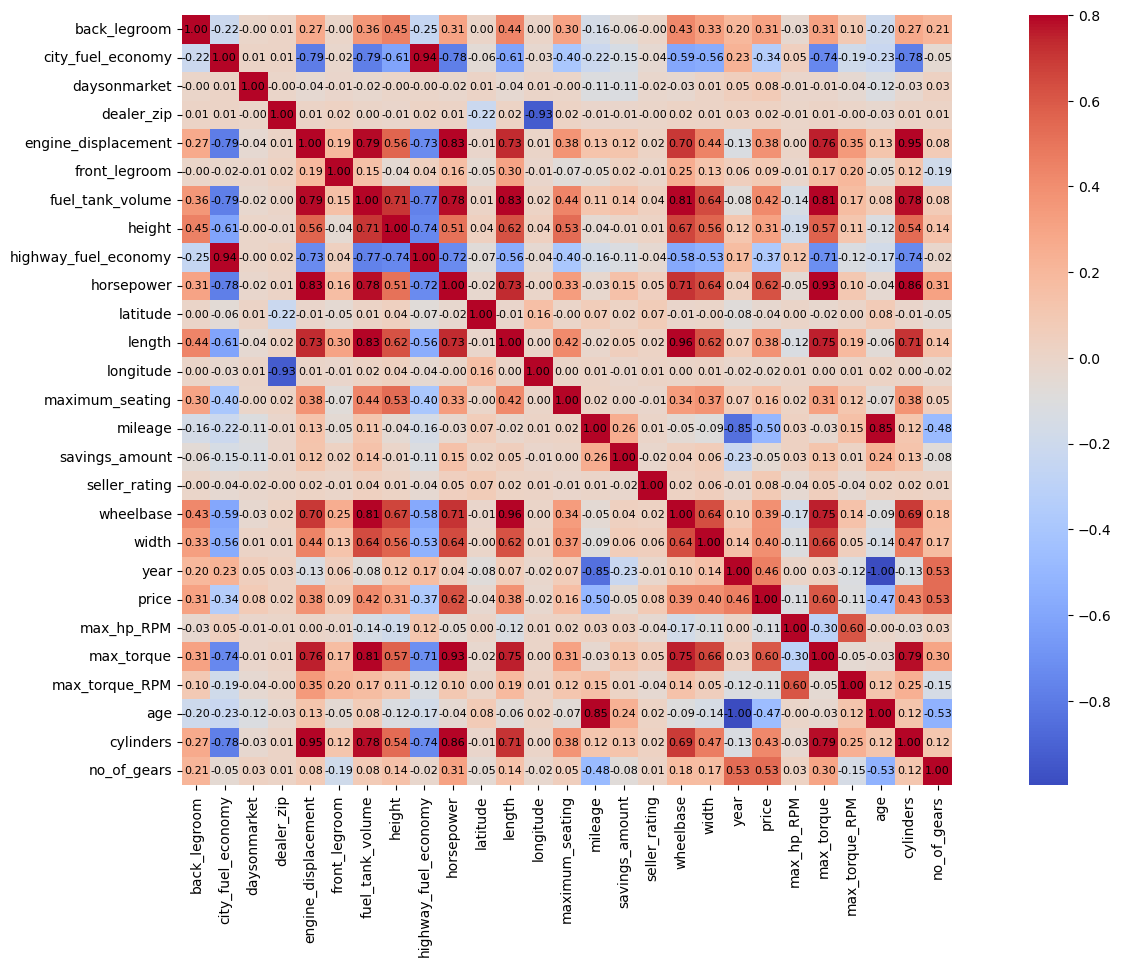

In [ ]:
import seaborn as sns

numerical_columns = df_train.select_dtypes(include=['int', 'float']).columns
corrmat = df_train[numerical_columns].corr()

f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
# plt.show()

# Create the heatmap
heatmap = sns.heatmap(corrmat, annot=True, fmt=".2f", cmap='coolwarm', vmax=.8, square=True)

# Adjust font size and color of annotations
for text in heatmap.texts:
    text.set_fontsize(8)  # Adjust the font size as needed
    text.set_color('black')  # Set the font color

# Show the plot
plt.show()


This shows the correlations between the variables and help us to identify the features that are most correlated with the target variable. To make the identification of this easier, the correlations with the target variable is extracted and plotted below.

This also shows the correlation between features themselves. For example we can see `engine_displacement` and `fuel_tank_volume` are both highly correlated with `horsepower` while being only moderately correlated with `price`. This could indicate ta duplication into the predictive model from `engine_displacement` and `fuel_tank_volume`. Excluding one or both these features, is therefore, something we would be cheking out during the model building stage.
    
`savings_amount`, `seller_rating`, `longitude` and `latitude` show no correlations worth noting as per the above plot and these are the kind of features to be excluded from a predictive model.

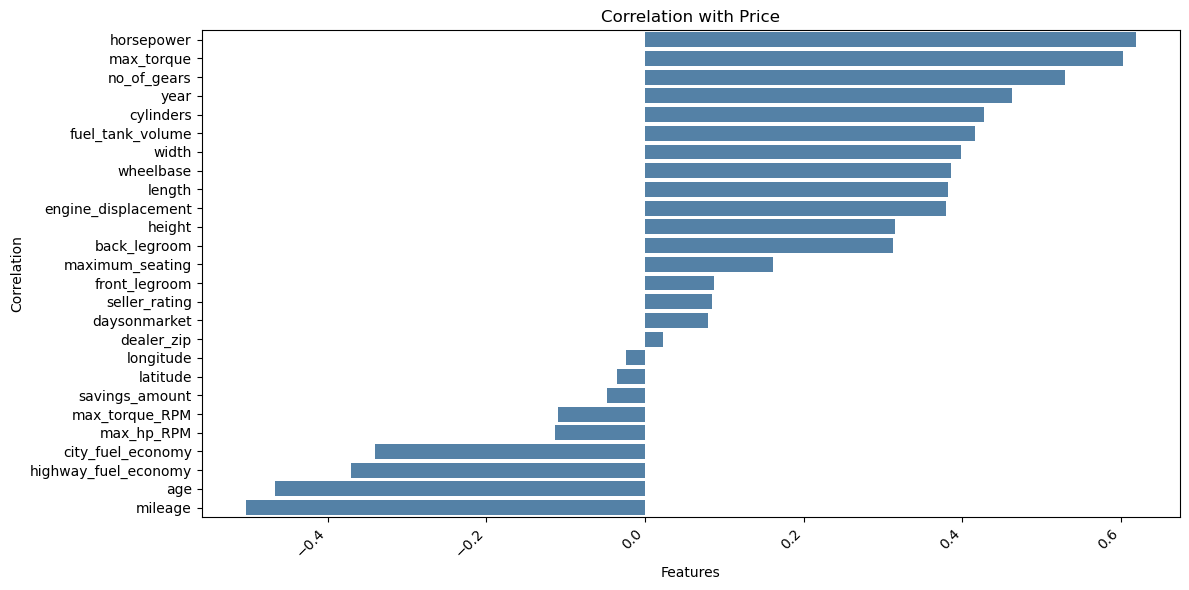

In [ ]:
# Extract correlations of features with 'price'
price_correlations = corrmat['price'].drop('price')  # Drop 'price' column itself
price_correlations_sorted = price_correlations.sort_values(ascending=False)

# Define custom color palette
palette = sns.color_palette("Blues", n_colors=len(price_correlations_sorted))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=price_correlations_sorted.values, y=price_correlations_sorted.index, color= 'steelblue')  # Use 'Blues' palette
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


Information regarding the correlations the features have with the target variable `price` was extacted from the correlations map and plotted above. It shows that features like `dealer_zip`, `longitude` and `latitude` have no worthwhile correlation with the target variable. Therefore this helps the model building to identify which features are likely to be best suited in the model and which, best be excluded.
    
In the next secion of model building, we will be looking at this to select features based on their relationship with the target variable.
    
The most correlated features are then selected from this information to draw scatter plots below to show the relationship between each of those selected features and `price`.

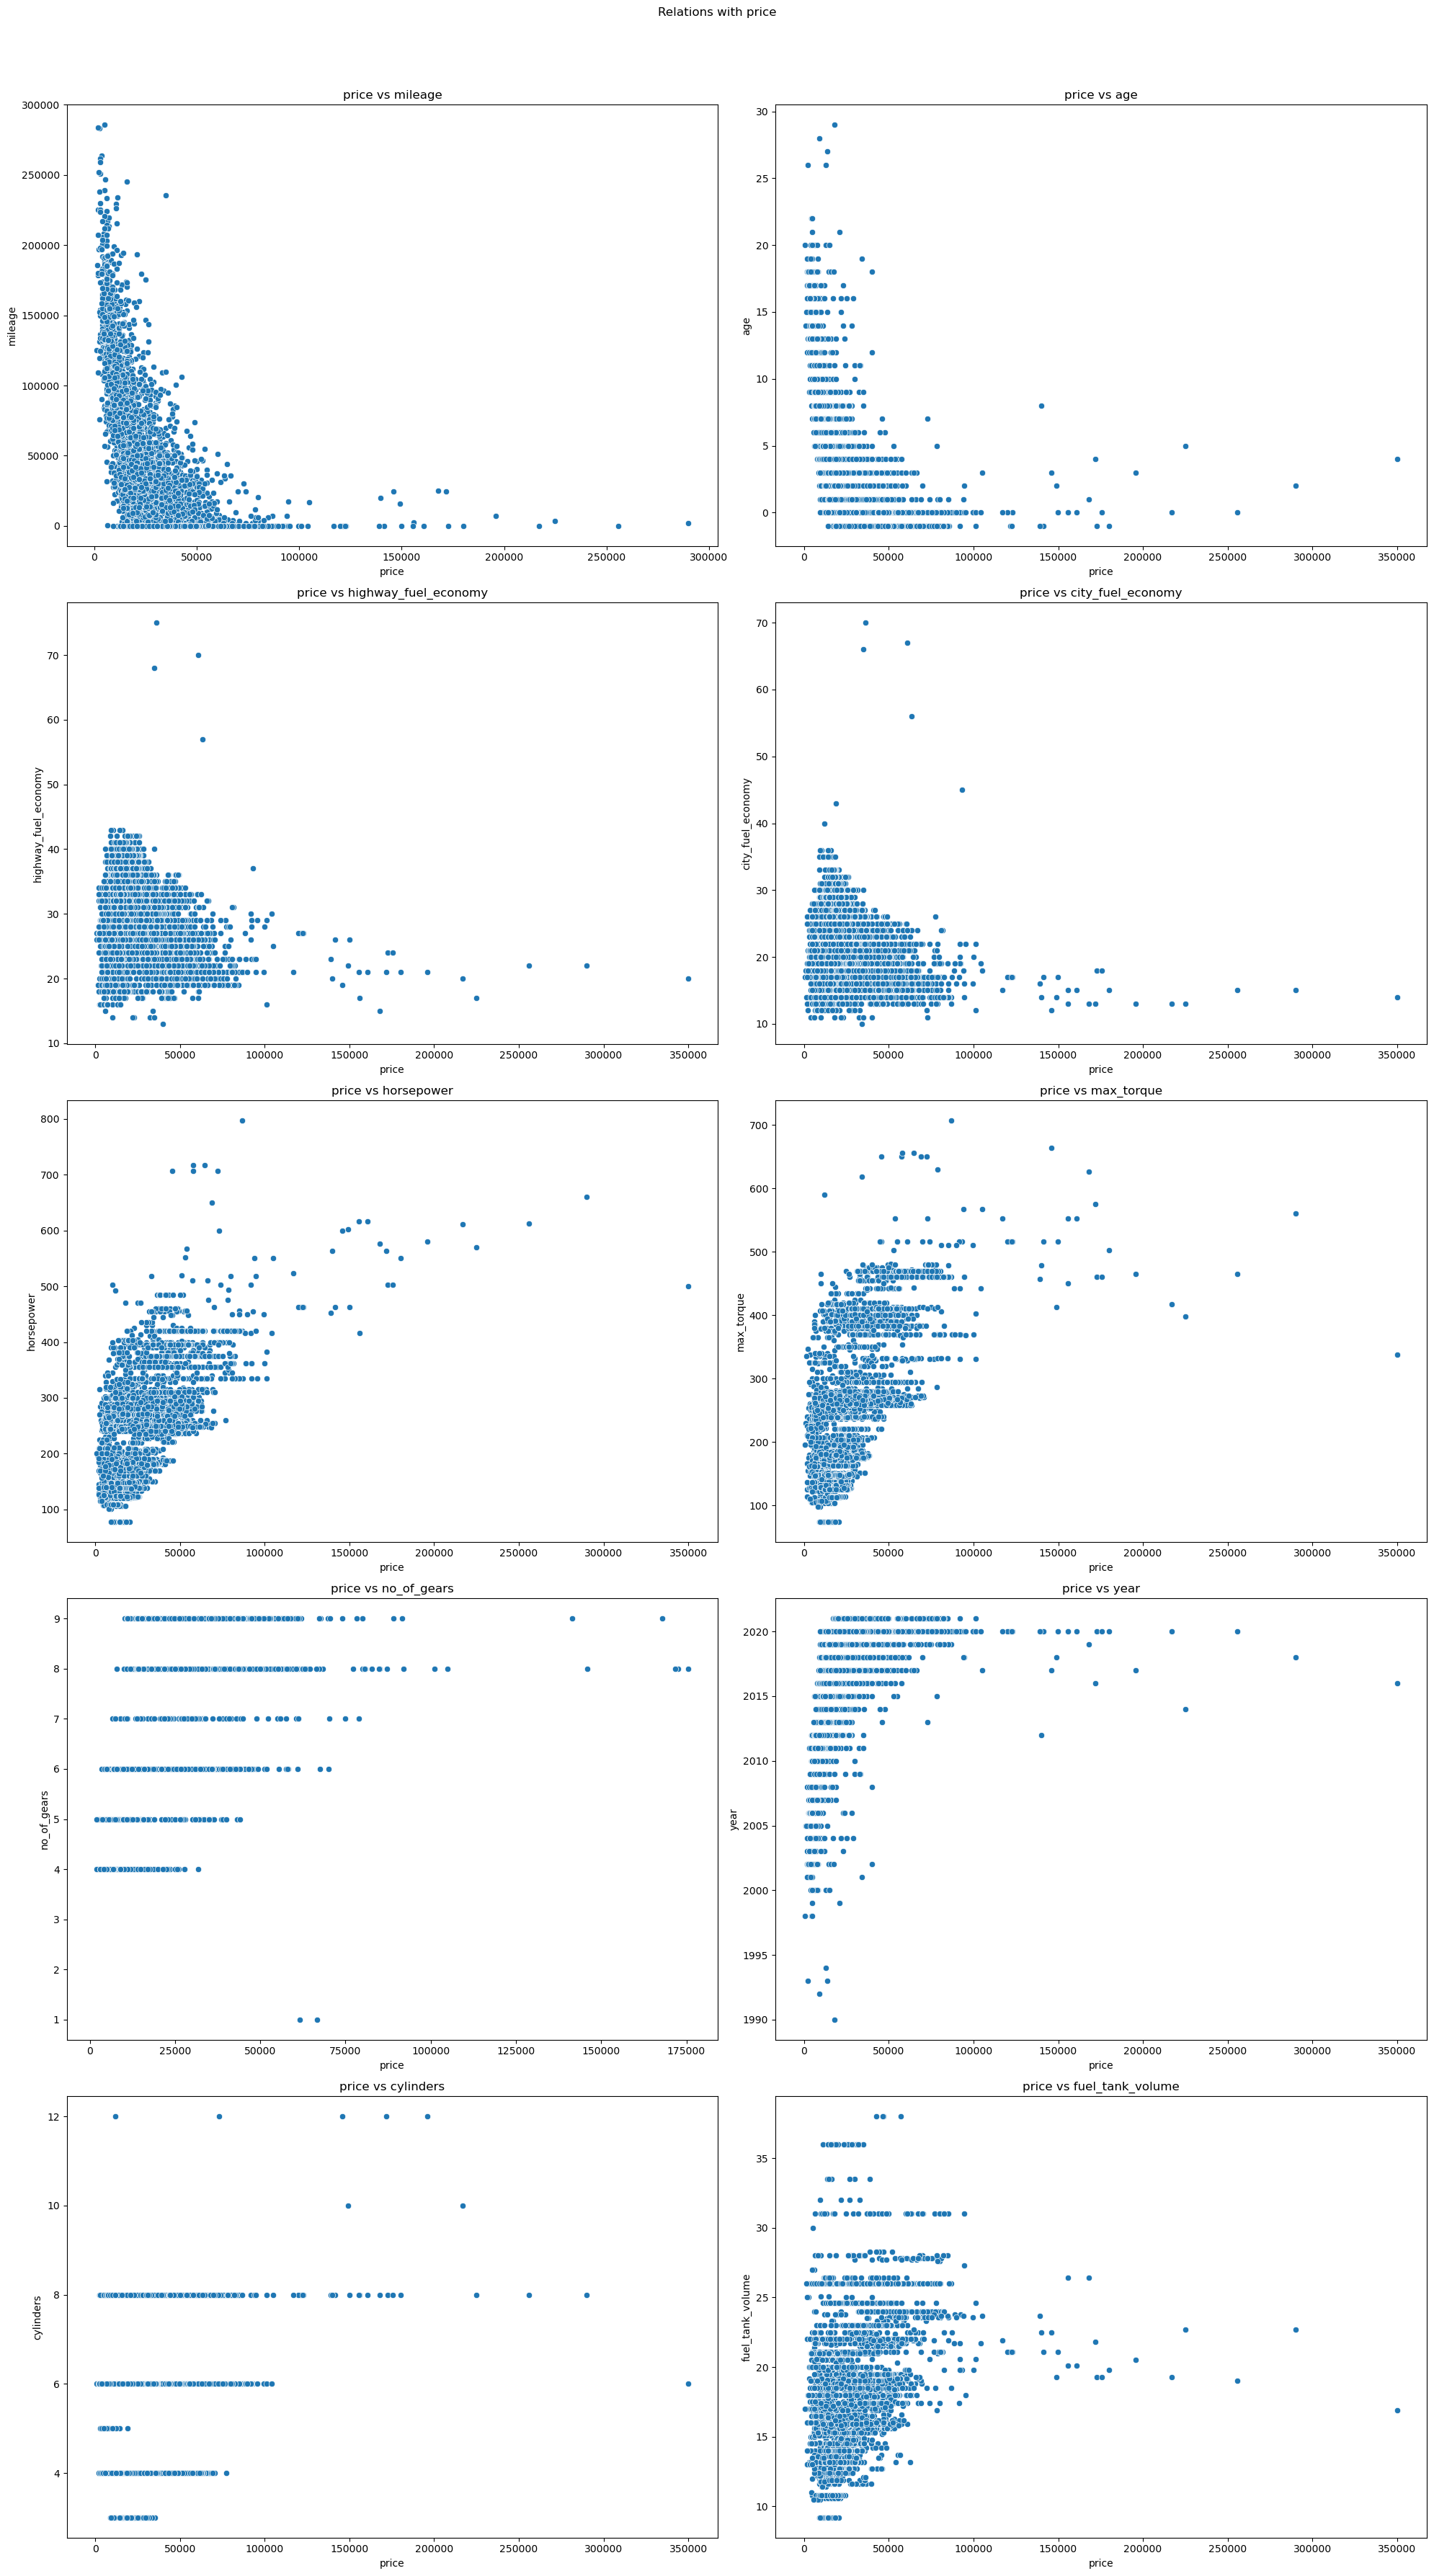

In [ ]:
import seaborn as sns

selected_column = 'price'

# Select the columns to include in the pair plots
# columns_to_include = [column for column in df_train.columns if column != selected_column and column not in columns_to_exclude]
columns_to_include = ['mileage', 'age', 'highway_fuel_economy', 'city_fuel_economy', 'horsepower', 'max_torque', 'no_of_gears', 'year', 'cylinders', 'fuel_tank_volume']
# Number of columns for the grid
n_cols = 2
n_rows = (len(columns_to_include) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows))
fig.suptitle(f'Relations with {selected_column}', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each pair plot in the grid
for idx, column in enumerate(columns_to_include):
    sns.scatterplot(x=selected_column, y=column, data=df_train, ax=axes[idx])
    axes[idx].set_title(f'{selected_column} vs {column}')

# Remove any empty subplots
for idx in range(len(columns_to_include), n_rows * n_cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

`horsepower` and `max_torque` show a non-linear relationship with price as per their scatter plots above. This would indicate the need for polinomial features to allow for the model to be able to better fit the data.
    
`price` relationship with `age` and `mileage` are both similar with it being negative relationship as can be expected. Higher the `mileage`, clearly the lower the `price` becomes.



---
## Fit and tune a forecasting model

In [ ]:
# Splitting back
df_train_encoded = combined_quad_df.iloc[:len(df_train_without_price)]
df_test_encoded = combined_quad_df.iloc[len(df_train_without_price):]

columns_to_exclude = ['vin', 'city', 'dealer_zip', 'listed_date', 'model_name']

# Separating features and target variable for training set
X_train = df_train_encoded.drop(columns=columns_to_exclude)
y_train = df_train[['price']]

# Separating features for the test set
X_test = df_test_encoded.drop(columns=columns_to_exclude)

#### Data Splitting and Feature Selection

Before training our models, we separated the combined dataset back into training and testing sets, and identified and excluded columns that cannot be used as features for model training due to their non-predictive nature, such as identifiers, text-based data, and those with the object data type. The target variable `price` was then separated from the features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_percentage_error

# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Reshape y_train to be a 1D array
#y_train = y_train.values.ravel()

#### Scaling Features and Importing Models

To ensure that all features contribute equally to the model's decision process, we applied feature scaling. This normalization of the feature set helps in optimizing the performance of many machine learning algorithms. Necessary libraries were also imported for building and evaluating various regression models.


In [ ]:
# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=1, n_jobs=-1)
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
lasso_model = Lasso(alpha=0.1, random_state=42)
ridge_model = Ridge(alpha=0.1, max_iter=20000)

# Train and evaluate Linear Regression
linear_model.fit(X_train_scaled, y_train)
y_train_pred = linear_model.predict(X_train_scaled)
linear_mape = mean_absolute_percentage_error(y_train, y_train_pred)
print(f"Linear Regression MAPE: {linear_mape}")

# Define parameter grids for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5]
}
lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1]
}
gb_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

Linear Regression MAPE: 0.24778331777677243


#### Model Initialization and Evaluation

We initiated various regression models and train the Linear Regression model as a baseline, and evaluated its performance using the Mean Absolute Percentage Error (MAPE), which provided a perspective on the average error in percentage terms.

In [ ]:
# Define a custom scorer for MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Reshape y_train to be a 1D array
y_train_reshaped = y_train.values.ravel()

# Hyperparameter tuning using RandomizedSearchCV (rf & gb)
rf_random_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=30, cv=5, scoring=mape_scorer, n_jobs=-1, random_state=42)
gb_random_search = RandomizedSearchCV(gb_model, gb_param_grid, n_iter=30, cv=5, scoring=mape_scorer, n_jobs=-1, random_state=42)

# Fit the models (rf & gb)
rf_random_search.fit(X_train, y_train_reshaped)
gb_random_search.fit(X_train, y_train_reshaped)

# Best parameters and MAPE scores (rf & gb)
print(f"Best parameters for Random Forest: {rf_random_search.best_params_}")
print(f"Best MAPE for Random Forest: {-rf_random_search.best_score_}")
print()
print("Best parameters for Gradient Boosting: ", gb_random_search.best_params_)
print("Best MAPE for Gradient Boosting: ", -gb_random_search.best_score_)

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 15}
Best MAPE for Random Forest: 0.13088176851683483

Best parameters for Gradient Boosting:  {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.1}
Best MAPE for Gradient Boosting:  0.13061262940379226


**Note:** Tree-based models like decision trees, random forests, and gradient boosting machines typically do not require feature scaling. This is because the decisions made in these models are based on order and thresholds, rather than distances or magnitudes.

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV (lasso & ridge)
lasso_random_search = RandomizedSearchCV(lasso_model, lasso_param_grid, n_iter=30, cv=5, scoring=mape_scorer, n_jobs=-1, random_state=42)
ridge_random_search = RandomizedSearchCV(ridge_model, ridge_param_grid, n_iter=30, cv=5, scoring=mape_scorer, n_jobs=-1, random_state=42)

# Fit the models (lasso & ridge)
lasso_random_search.fit(X_train_scaled, y_train)
ridge_random_search.fit(X_train_scaled, y_train)

# Best parameters and MAPE scores (lasso & ridge)
print(f"Best parameters for Lasso: {lasso_random_search.best_params_}")
print(f"Best MAPE for Lasso: {-lasso_random_search.best_score_}")
print()
print(f"Best parameters for Ridge: {ridge_random_search.best_params_}")
print(f"Best MAPE for Ridge: {-ridge_random_search.best_score_}")

/Users/shailenesese/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+11, tolerance: 1.828e+08
  model = cd_fast.enet_coordinate_descent(
/Users/shailenesese/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.268e+11, tolerance: 1.783e+08
  model = cd_fast.enet_coordinate_descent(
/Users/shailenesese/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Best parameters for Lasso: {'alpha': 10.0}
Best MAPE for Lasso: 0.24906842076490135

Best parameters for Ridge: {'alpha': 1}
Best MAPE for Ridge: 0.25243891504143734


In [ ]:
# Collect the MAPE scores
mape_scores = {
    'Random Forest': -rf_random_search.best_score_,
    'Gradient Boosting': -gb_random_search.best_score_,
    'Lasso': -lasso_random_search.best_score_,
    'Ridge': -ridge_random_search.best_score_
}

# Select the best model based on MAPE
best_model_name = min(mape_scores, key=mape_scores.get)
best_model = {
    'Random Forest': rf_random_search.best_estimator_,
    'Gradient Boosting': gb_random_search.best_estimator_,
    'Lasso': lasso_random_search.best_estimator_,
    'Ridge': ridge_random_search.best_estimator_
}[best_model_name]

print(f"Best model: {best_model_name} with Cross-Validated MAPE: {mape_scores[best_model_name]}")

Best model: Gradient Boosting with Cross-Validated MAPE: 0.13061262940379226


#### Hyperparameter Tuning and Predicting with Gradient Boosting

Using the best parameters found from previous tuning efforts, we trained the Gradient Boosting Regressor. We then made predictions on both the training and testing datasets, evaluating the model's performance on the training set using MAPE.

In [ ]:
# Gradient Boosting using best parameters

GBR = GradientBoostingRegressor(n_estimators= 150, min_samples_split= 5, max_depth= 5, learning_rate= 0.1)
#print("Best Cross-Validated MAPE for Gradient Boosting: ", -gb_random_search.best_score_)

GBR.fit(X_train, y_train_reshaped)

df_test_encoded['price'] = GBR.predict (X_test)
df_train_encoded['y_pred'] = GBR.predict (X_train)
GBR_MAPE = mean_absolute_percentage_error(y_train['price'], df_train_encoded['y_pred'])

print(f"Gradient Boosting MAPE on Training Data: {GBR_MAPE:.6f}")

Gradient Boosting MAPE on Training Data: 0.099817


Initially, five different regressors (LinearRegression, RandomForestRegressor, GradientBoostingRegressor, Lasso, and Ridge) were used to see how each performed. Advanced techniques like RandomizedSearchCV and cross validation were also done. These methods improved the training dataset slightly, but failed to  make a big difference on the test dataset needed for the Kaggle competition.

Gradient Boosting has the best Cross-Validated MAPE of 0.13061 and 0.099817 MAPE on the training data, indicating that, on average, the predictions are approximately 9.98% away from the actual values which means that th he predicted values are less accurate, with a deviation of nearly 10% from the actual values.

Due to this, we shifted our focus on exploring additional modeling techniques. XGBoost was integrated as a new regressor wherein subsequent parameter tuning was conducted to enhance its predictive accuracy.

#### XGBoost Model Initialization and Hyperparameter Tuning

XGBoost regressor was initialized and a parameter grid was defined for hyperparameter tuning using `RandomizedSearchCV`. The goal was to find the best combination of parameters that minimizes the Mean Absolute Percentage Error (MAPE) during cross-validation.


In [ ]:
from xgboost import XGBRegressor

# Initialize model
XGB = XGBRegressor(n_estimators=400, random_state=32)

# Define XGB parameter grids for hyperparameter tuning
XGB_param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [5, 7]
}

# Hyperparameter tuning using RandomizedSearchCV (XGBoost)
XGB_random_search = RandomizedSearchCV(XGB, XGB_param_grid, n_iter=30, cv=5, scoring=mape_scorer, n_jobs=-1, random_state=42)

# XGBoost Grid Search - and fit using non-scaled X
XGB_random_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {XGB_random_search.best_params_}")
print(f"Best MAPE for XGBoost: {-XGB_random_search.best_score_}")

Best parameters for Random Forest: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3}
Best MAPE for XGBoost: 0.13505101871219


#### Final XGBoost Model Training and Evaluation

After determining the best hyperparameters, we retrained the XGBoost model using these parameters and evaluated its performance on the training data. We then used this model to make predictions on both the training and testing datasets. Fine-tuning XGBoost’s parameters based on previous attempts helped improve its accuracy.


In [ ]:
# XGBoost using best parameters
XGB = XGBRegressor(n_estimators=400, min_child_weight=4, max_depth=8,
                               random_state=32)
XGB.fit(X_train, y_train)

print(f"Best Cross-Validated MAPE for XGBoost: {-XGB_random_search.best_score_}")

Best Cross-Validated MAPE for XGBoost: 0.13505101871219


In [ ]:
df_test_encoded['price'] = XGB.predict (X_test)
df_train_encoded['y_pred'] = XGB.predict (X_train)
XGB_MAPE = mean_absolute_percentage_error(y_train['price'], df_train_encoded['y_pred'])

print(f"XGBoost MAPE on Training Data: {XGB_MAPE:.6f}")

XGBoost MAPE on Training Data: 0.006242


Compared to Gradient Boosting and the other models, XGBoost has 0.006242 MAPE on the training data, indicating that the predictions are very close to the actual values, with an average percentage error of just about 0.62%. This indicates a high level of accuracy in the predictions.



#### Generating CSV file of Predictions

Finally, a CSV output file containing the VIN and predicted prices from using XGBoost was generated.


In [ ]:
output_file_name = f"predictions.csv"

df_test_encoded.to_csv(output_file_name, columns=['vin','price'],index=False)
print("Submission file created")

Submission file created
